In [28]:
import pandas as pd
import numpy as np

np.random.seed(1234)

n = 100

data = {
    'age': np.random.randint(18, 65, size=n),  
    'salary': np.random.normal(loc=50000, scale=15000, size=n).astype(int),  
    'department': np.random.choice(['HR', 'Engineering', 'Marketing'], size=n, p=[0.7, 0.2, 0.1])
}

# 데이터프레임 생성
df = pd.DataFrame(data)

df['department'].value_counts()

HR             72
Engineering    19
Marketing       9
Name: department, dtype: int64

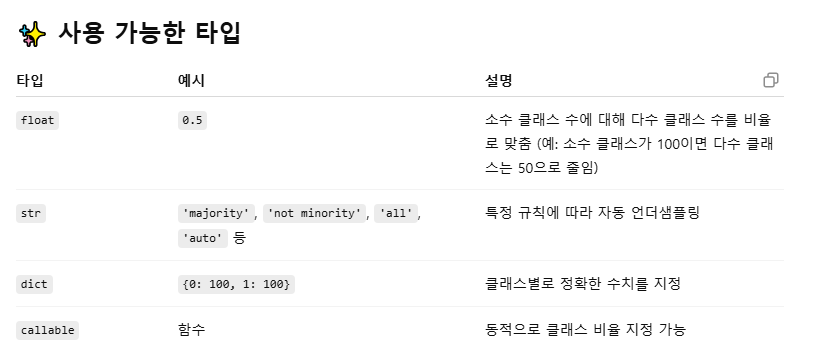

In [29]:
from imblearn.under_sampling import RandomUnderSampler

# 0.5 (float) 다수 클래스를 소수 클래스의 0.5배로 줄임
# 'majority' 가장 많은 클래스만 줄임
# 'not minority' 소수 클래스 제외한 전부 줄임
# dict 클래스별 샘플 수를 명시
# callable 샘플 수 동적 계산 가능

undersample = RandomUnderSampler(sampling_strategy='majority', random_state=1234)
X_train, y_train = undersample.fit_resample(df[['age', 'salary']], df['department']) # fit_resample(data, class)

In [30]:
df_resampled = pd.DataFrame(X_train, columns=['age', 'salary'])
df_resampled['department'] = y_train

In [31]:
df_resampled['department'].value_counts()

Engineering    19
Marketing       9
HR              9
Name: department, dtype: int64

In [32]:
# 모든 클래스가 소수 클래스가 되도록 설정 or not minority
target_counts = {
    'HR': df['department'].value_counts()['Marketing'],  
    'Engineering': df['department'].value_counts()['Marketing']
}

undersample = RandomUnderSampler(sampling_strategy=target_counts, random_state=1234)
X_train, y_train = undersample.fit_resample(df[['age', 'salary']], df['department'])

In [33]:
df_resampled = pd.DataFrame(X_train, columns=['age', 'salary'])
df_resampled['department'] = y_train

In [34]:
df_resampled['department'].value_counts()

Marketing      9
HR             9
Engineering    9
Name: department, dtype: int64